## Helioseismology project - Part 1
Sound speed profile comparison between the two models: `a09` or `gs98`:

In [240]:
# Required imports
import mesa_reader as mr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

# Matplolib style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

In [241]:
# Load the profile file into a MesaData instance
p_a09 = mr.MesaData('./profile22_a09.data')
p_gs98 = mr.MesaData('./profile22_gs98.data')

# Reading Basu data file
basu_data = pd.read_table('./basu_09.txt', sep = '\s+', header = None, names = ['r', 'c', 'Sigma_c'], skiprows = 8)

# Access the star's age. Check if it has the same age as the Sun has now (confirmation).
age_a09 = p_a09.star_age
age_gs98 = p_gs98.star_age
print(f'Star\'s age = {age_a09:.3e} years [Model: a09].')
print(f'Star\'s age = {age_gs98:.3e} years [Model: gs98].')
print(f'Sun\'s age = {4.603e9:.3e} years.') # Close enough, for now.

Star's age = 4.603e+09 years [Model: a09].
Star's age = 4.603e+09 years [Model: gs98].
Sun's age = 4.603e+09 years.


### `a09` model:

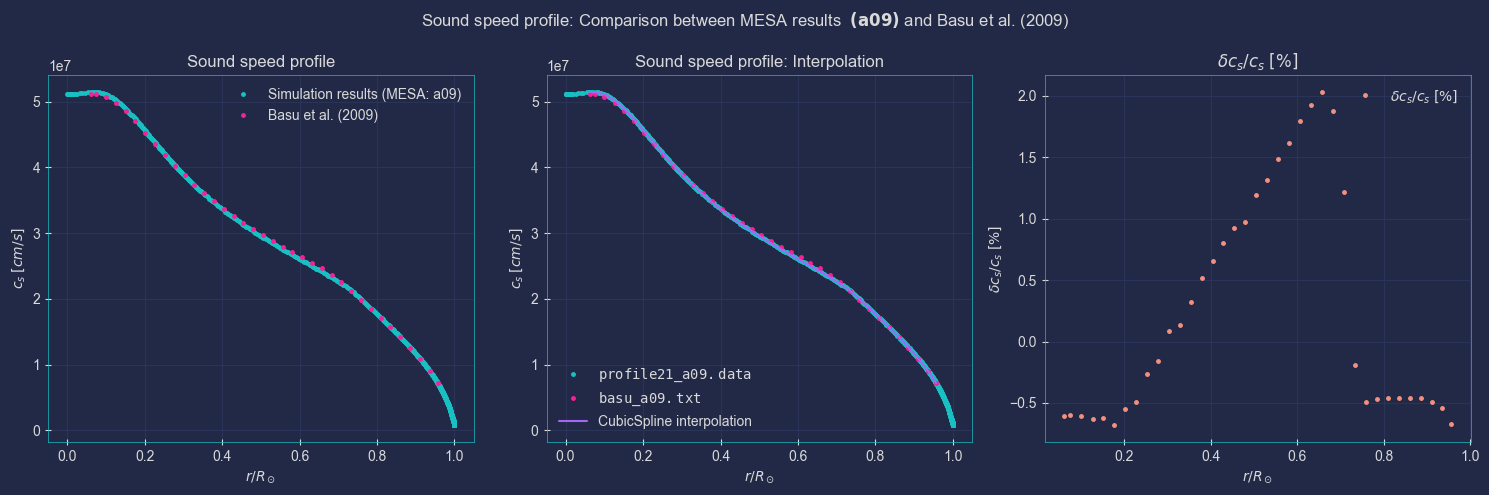

In [242]:
# Star's radii and sound speed values (MESA results).
csound_a09 = p_a09.csound
radii_a09  = p_a09.radius

# Plotting results.
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(radii_a09, csound_a09, 'o', markersize = 2.5, label = 'Simulation results (MESA: a09)')
ax[0].plot(basu_data['r'], basu_data['c'], 'o', markersize = 2.5, label = 'Basu et al. (2009)')
ax[0].set_title('Sound speed profile')
ax[0].set_xlabel(r'$r/R_\odot$')
ax[0].set_ylabel(r'$c_s$ $[cm/s]$')
ax[0].legend()

# Interpolating, so we can compare the results more easily.
# I interpolate the MESA results, so we can compute those values in the same radii as the Basu data.
# I do it this way because we have more points for the MESA profile, which (should) results in a more accurate interpolation.
x  = radii_a09[::-1]
y  = csound_a09[::-1]
cs = CubicSpline(x, y)
xs = basu_data['r']

# Plotting the interpolation's results
ax[1].plot(x, y, 'o', markersize = 2.5, label = r"$\mathtt{profile21\_a09.data}$")
ax[1].plot(basu_data['r'], basu_data['c'], 'o', markersize = 2.5, label = r"$\mathtt{basu\_a09.txt}$")
ax[1].plot(xs, cs(xs), label = "CubicSpline interpolation")
ax[1].set_title('Sound speed profile: Interpolation')
ax[1].set_xlabel(r'$r/R_\odot$')
ax[1].set_ylabel(r'$c_s$ $[cm/s]$')
ax[1].legend(loc = 'lower left', ncol = 1)

# Computing the relative difference between the MESA results and the Basu data.
Delta_csound_div_csound_a09 = (basu_data['c'] - cs(xs))/cs(xs)

# Plotting said relative difference.
ax[2].plot(basu_data['r'], Delta_csound_div_csound_a09 * 100, 'o', markersize = 2.5, \
           label = r"$\delta c_s/c_s$ $[\%]$", color = 'C3')
ax[2].set_title(r'$\delta c_s/c_s$ $[\%]$')
ax[2].set_xlabel(r'$r/R_\odot$')
ax[2].set_ylabel(r'$\delta c_s/c_s$ $[\%]$')
ax[2].legend()
plt.suptitle(r'Sound speed profile: Comparison between MESA results  $\mathbf{(a09)}$ and Basu et al. (2009)')
plt.tight_layout()
plt.savefig('csound_a09.png', dpi = 300)
plt.show()

### `gs98` model:

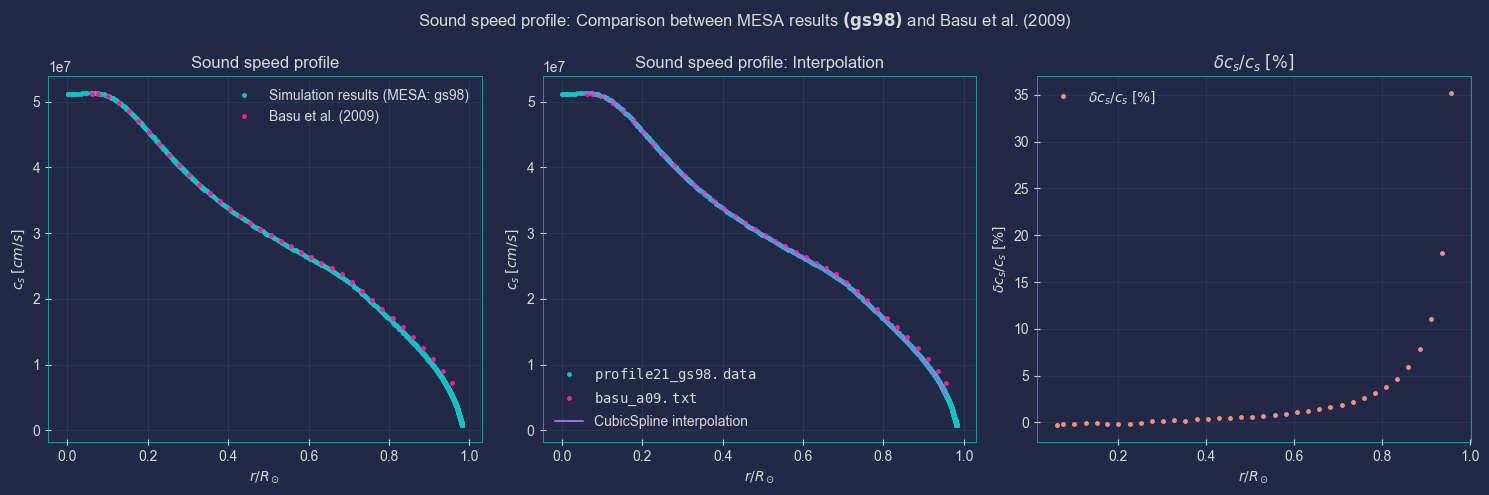

In [243]:
csound_gs98 = p_gs98.csound
radii_gs98  = p_gs98.radius

# Plotting results.
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(radii_gs98, csound_gs98, 'o', markersize = 2.5, label = 'Simulation results (MESA: gs98)')
ax[0].plot(basu_data['r'], basu_data['c'], 'o', markersize = 2.5, label = 'Basu et al. (2009)')
ax[0].set_title('Sound speed profile')
ax[0].set_xlabel(r'$r/R_\odot$')
ax[0].set_ylabel(r'$c_s$ $[cm/s]$')
ax[0].legend()

# Interpolating, so we can compare the results more easily.
# I interpolate the MESA results, so we can compute those values in the same radii as the Basu data.
# I do it this way because we have more points for the MESA profile, which (should) results in a more accurate interpolation.
x  = radii_gs98[::-1]
y  = csound_gs98[::-1]
cs = CubicSpline(x, y)
xs = basu_data['r']

# Plotting the interpolation's results
ax[1].plot(x, y, 'o', markersize = 2.5, label = r"$\mathtt{profile21\_gs98.data}$")
ax[1].plot(basu_data['r'], basu_data['c'], 'o', markersize = 2.5, label = r"$\mathtt{basu\_a09.txt}$")
ax[1].plot(xs, cs(xs), label = "CubicSpline interpolation")
ax[1].set_title('Sound speed profile: Interpolation')
ax[1].set_xlabel(r'$r/R_\odot$')
ax[1].set_ylabel(r'$c_s$ $[cm/s]$')
ax[1].legend(loc = 'lower left', ncol = 1)

# Computing the relative difference between the MESA results and the Basu data.
Delta_csound_div_csound_gs98 = (basu_data['c'] - cs(xs))/cs(xs)

# Plotting said relative difference.
ax[2].plot(basu_data['r'], Delta_csound_div_csound_gs98 * 100, 'o', markersize = 2.5, \
           label = r"$\delta c_s/c_s$ $[\%]$", color = 'C3')
ax[2].set_title(r'$\delta c_s/c_s$ $[\%]$')
ax[2].set_xlabel(r'$r/R_\odot$')
ax[2].set_ylabel(r'$\delta c_s/c_s$ $[\%]$')
ax[2].legend()
plt.suptitle(r'Sound speed profile: Comparison between MESA results $\mathbf{(gs98)}$ and Basu et al. (2009)')
plt.tight_layout()
plt.savefig('csound_gs98.png', dpi = 300)
plt.show()

### Comparison between `a09` and `bs98` models:

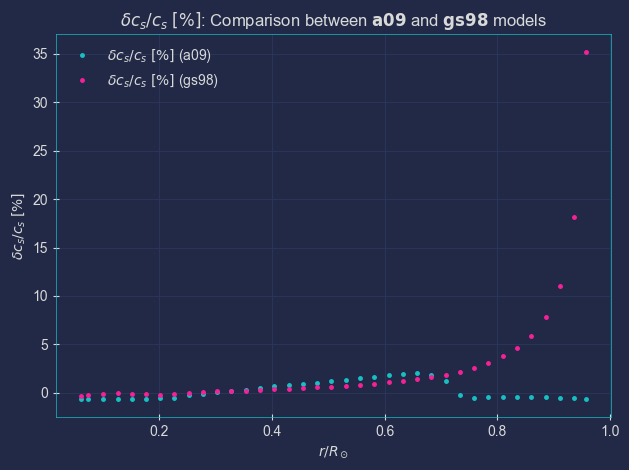

In [244]:
# Comparison of the two models
plt.plot(basu_data['r'], Delta_csound_div_csound_a09 * 100, 'o', markersize = 2.5, \
              label = r"$\delta c_s/c_s$ $[\%]$ (a09)", color = 'C0')
plt.plot(basu_data['r'], Delta_csound_div_csound_gs98 * 100, 'o', markersize = 2.5, \
                label = r"$\delta c_s/c_s$ $[\%]$ (gs98)", color = 'C1')
plt.title(r'$\delta c_s/c_s$ $[\%]$: Comparison between $\mathbf{a09}$ and $\mathbf{gs98}$ models')
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$\delta c_s/c_s$ $[\%]$')
plt.legend()
plt.tight_layout()
plt.savefig('csound_comparison.png', dpi = 300)
plt.show()

It appears that the `gs98` model agrees better with what is verified experimentally.

In [245]:
%history

# Required imports
import mesa_reader as mr
import matplotlib.pyplot as plt

# Matplolib style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')
data = pd.read_table('./basu_09.txt')
data
# Required imports
import mesa_reader as mr
import matplotlib.pyplot as plt
import pandas as pd

# Matplolib style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')
data = pd.read_table('./basu_09.txt')
data
data = pd.read_table('./basu_09.txt', sep = '\s+', header = None)
data
data = pd.read_table('./basu_09.txt', sep = '\s+', header = None, skiprows = 8)
data
data = pd.read_table('./basu_09.txt', sep = '\s+', header = 'infer', skiprows = 8)
data
data = pd.read_table('./basu_09.txt', sep = '\s+', header = 0, skiprows = 8)
data
data = pd.read_table('./basu_09.txt', sep = '\s+', header = 1, skiprows = 8)
data
data = pd.read_table('./basu_09.txt', sep = ' ', header = None, names = [], skiprows = 8)
data
data = pd.read_table('.